In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
album1 = pd.read_csv('../test/testdata/tweets/album1.csv')
album2 = pd.read_csv('../test/testdata/tweets/album2.csv')
album3 = pd.read_csv('../test/testdata/tweets/album3.csv')

In [19]:
def normalize_dates(df, release_date, start=-2, end=10):
    '''
    Normalizes dates to release date, only keeping "start" days
    before to "end" days after. Returns a copy.
    '''
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    date_diff = (pd.Timestamp(release_date) - df['date'].min())
    normalized_dates = (pd.factorize(df['date'], sort=True)[0] - date_diff.days).astype(object)
    
    # remove out of scope
    normalized_dates[(normalized_dates > end) | (normalized_dates < start)] = np.NaN
    df['normalized_dates'] = normalized_dates
    return df.dropna(subset=['normalized_dates'])

In [4]:
norm_album1 = normalize_dates(album1, '2014-08-19')
norm_album1.head()

,date,username,normalized_dates
0,2014-08-29,user0,10
1,2014-08-21,user1,2
2,2014-08-26,user2,7
3,2014-08-21,user3,2
5,2014-08-23,user5,4


In [21]:
def plot_albums(title, *album_tups):
    '''
    Plots multiple albums as a single overlayed line plot with
    normalized dates
    '''
    assert len(album_tups) > 1, 'passed in only one album'
    assert len(album_tups[0]) == 2, 'need to pass in both album and legend name'
    assert all(['normalized_dates' in album.columns for album, leg in album_tups])
    
    legend = []
    album, leg = album_tups[0]
    legend.append(leg)
    ax = album.groupby('normalized_dates').size().plot(figsize=(10,7), title=title)
    for album_tup in album_tups[1:]:
        album, leg = album_tup
        legend.append(leg)
        album.groupby('normalized_dates').size().plot(ax=ax)
        
    # release date line
    mean_counts = album.normalized_dates.value_counts().mean()
    ax.annotate('Album Release', xy = (0, np.mean([0, mean_counts])), color='purple', alpha = 0.5)
    ax.axvline(0, color='purple', alpha=0.5)
    
    # legend
    ax.legend(legend)

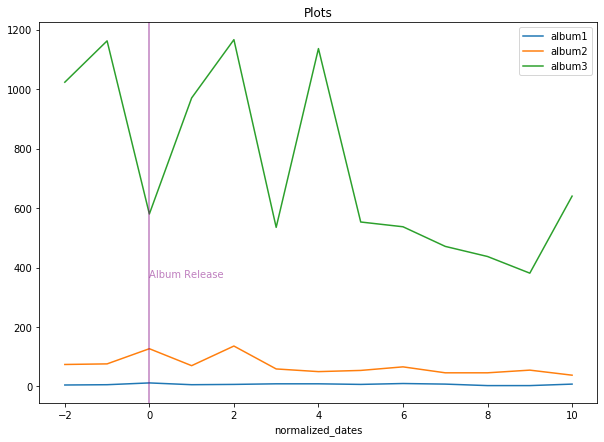

In [24]:
album1 = normalize_dates(album1, '2014-08-19')
album2 = normalize_dates(album2, '2018-05-18')
album3 = normalize_dates(album3, '2020-11-20')
plot_albums('Plots', (album1, 'album1'), (album2, 'album2'), (album3, 'album3'))